<h1>Assessing The SDT Ratio's Capability As An NLLS Initialisation Criterion</h1>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind

<h2>Importing The Dataset + Preprocessing</h2>

In [2]:
# Absolute filepath for the .csv file to be loaded
absolute_filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\sdt.csv"

# Loading the .csv file as a dataframe into the workspace.
df = pd.read_csv(absolute_filepath)

# While all other parameters are worth investigating, we want to specifically see how well the following features fare
# in the classification of the spindles, namely the SDT ratio.
all_params = df.columns
important_params = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio', 'label']
important_params_nolabel = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio']
other_params = ['qps_energy', 'real_energy',
       'residual_energy', 'qser', 'rser', 'energy_error_percent',
       'real_freq_hz', 'qps_freq_hz', 'freq_error_percent',
       'raw_qps_corrcoeff', 'sdt_ratio', 'label']

# Extracting these from 'df':
df_important = df[all_params]

# We want to see the QPS parameter distribution for the spindles and non-spindles separately and see if there are any
# notable differences. A T-test is performed right after for an proper analytical comparison:
df_important_spin = df_important[(df_important['label'] == 1)]
df_important_nonspin = df_important[(df_important['label'] == 0)]

In [3]:
len(df)

392418

<h3>Spindle Statistics</h3>

In [4]:
df_important_spin.describe().round(3)

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
count,13553.000,13553.000,13553.000,1.355300e+04,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.000,13553.0
mean,0.216,-0.600,-10.368,9.098149e+06,63.352,0.591,2444.165,81912.550,2804.463,0.041,0.051,95.939,13.136,10.083,27.306,0.680,0.396,1.0
std,2.078,9.221,16.322,1.997112e+07,36.407,14.435,5429.061,186575.157,7890.261,0.059,0.119,5.861,1.115,5.794,41.580,0.373,0.328,0.0
min,-50.000,-193.355,-235.545,-7.208346e+07,-129.645,-162.043,0.000,3085.571,2.440,0.000,0.000,57.872,10.241,-20.634,0.001,-0.319,0.013,1.0
25%,-0.771,-2.088,-14.674,-1.221000e+00,69.010,-4.853,107.339,21433.412,127.807,0.003,0.004,94.959,12.289,10.983,1.799,0.568,0.189,1.0
50%,0.625,-0.485,-5.166,6.580000e-01,79.888,0.000,544.467,36869.739,321.790,0.018,0.008,98.217,13.313,12.715,3.842,0.872,0.316,1.0
75%,1.382,0.791,-0.790,3.050000e+00,85.847,6.290,2062.536,70639.258,1078.493,0.050,0.021,99.696,14.337,13.663,24.016,0.941,0.498,1.0
max,3.729,221.855,47.917,7.372272e+07,138.052,179.838,85074.486,4505982.687,124084.572,0.421,0.868,100.000,16.385,21.972,259.998,0.999,5.082,1.0


<h3>Non-Spindle Statistics</h3>

In [5]:
df_important_nonspin.describe().round(3)

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
count,378865.000,378865.000,378865.000,3.788650e+05,378865.000,378865.000,378865.000,3.788650e+05,378865.000,378865.000,378865.000,378865.000,378865.000,378865.000,378865.000,378862.000,378865.000,378865.0
mean,0.159,-0.349,-10.699,7.210332e+06,64.886,0.703,1597.690,7.718717e+04,1672.588,0.034,0.036,96.591,13.106,10.327,25.569,0.691,0.354,0.0
std,1.981,8.911,16.285,1.762991e+07,35.281,14.591,3832.910,2.658737e+05,5496.470,0.051,0.094,5.140,1.127,5.615,40.282,0.360,0.270,0.0
min,-50.000,-265.259,-311.263,-9.163724e+07,-200.680,-317.138,0.000,1.522239e+03,0.000,0.000,0.000,36.578,10.241,-31.939,0.000,-0.456,0.000,0.0
25%,-0.746,-1.951,-15.258,-1.265000e+00,71.704,-5.096,116.075,1.919127e+04,103.702,0.003,0.003,95.978,12.289,11.412,1.766,0.648,0.175,0.0
50%,0.575,-0.420,-5.467,5.620000e-01,80.052,0.000,443.348,3.264067e+04,242.149,0.016,0.007,98.439,13.313,12.741,3.746,0.868,0.291,0.0
75%,1.251,0.940,-0.939,2.709000e+00,85.855,6.708,1427.936,6.217693e+04,699.702,0.040,0.016,99.652,14.337,13.664,19.705,0.936,0.457,0.0
max,4.668,231.193,119.249,7.791540e+07,231.493,226.420,502069.617,1.922495e+07,565834.524,0.634,0.893,100.000,16.385,36.843,353.125,1.000,9.661,0.0


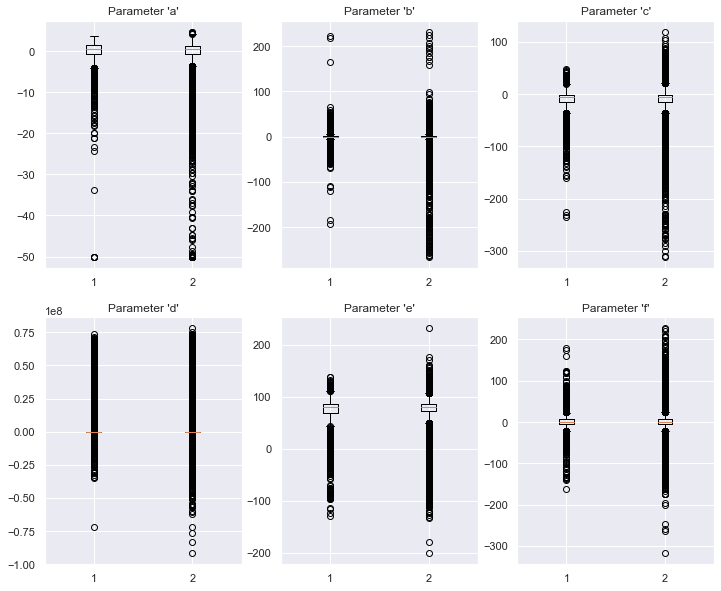

In [6]:
# Generate box plots for each column of the dataframe (other than the label):
fig, ax = plt.subplots(2,3,figsize=(12,10))
k = 0
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot([df_important_spin.iloc[:,k], df_important_nonspin.iloc[:,k]], showfliers=True)
        ax[i,j].set_title("Parameter '{}'".format(df_important_spin.columns[k]))
        ax[i,j].set_xticks([1,2], ["Spindles", "Non-Spindles"])
        k = k + 1
        
plt.savefig("scenario2_boxplot_withfliers.png", dpi=300, bbox_inches='tight')

# <h2>T-Test For Proper Statistical Comparison Between Features</h2>

For a significance level of $\alpha = 1\%$, only parameter $c$ can be used. However, if we loosen the significance level to $alpha = 5\%$, $c$, $d$ and the $sdt\_ratio$ can be used. We can experiment with this when we come to the neural network model.

In [7]:
# We need to ensure that the lengths of both the spindle and non-spindle dataframe are the same. Truncate the non-spindle
df_important_nonspin = df_important_nonspin.sample(frac=1).reset_index(drop=True)
df_important_nonspin = df_important_nonspin.iloc[0:len(df_important_spin), :]

# Now that the non-spindle subset has been truncated, the T-Test is ready to be used. Recall the significance level of 1%
list_params = ['a', 'b', 'c', 'd', 'e', 'f', 'qps_energy', 'real_energy',
       'residual_energy', 'qser', 'rser', 'energy_error_percent',
       'real_freq_hz', 'qps_freq_hz', 'freq_error_percent',
       'raw_qps_corrcoeff', 'sdt_ratio']
p = {}

for param in list_params:
    (_, p[param]) = ttest_ind(df_important_spin[param], df_important_nonspin[param])

# Print out the p-values for each parameter:
for param in list_params:
    print("Parameter {}: p = {}".format(param, p[param]))
    
# Return parameters that have p-values below 5% (for lee-way)
selected = []
for param in list_params:
    if p[param] < 0.01:
        selected.append(param)

selected

Parameter a: p = 0.004831214934453784
Parameter b: p = 0.05072013748570085
Parameter c: p = 0.2947267623300526
Parameter d: p = 1.6429584308435625e-17
Parameter e: p = 0.00017293027186794055
Parameter f: p = 0.8318567759439695
Parameter qps_energy: p = 1.528950699977477e-51
Parameter real_energy: p = 0.07163092086019579
Parameter residual_energy: p = 6.500686613188798e-49
Parameter qser: p = 6.96798333729318e-26
Parameter rser: p = 1.4110338696384659e-33
Parameter energy_error_percent: p = 6.967984191369406e-26
Parameter real_freq_hz: p = 0.02841272231700395
Parameter qps_freq_hz: p = 0.00017293027197604714
Parameter freq_error_percent: p = 0.00025807499380324376
Parameter raw_qps_corrcoeff: p = 0.019184975694948307
Parameter sdt_ratio: p = 1.3572850768220874e-37


['a',
 'd',
 'e',
 'qps_energy',
 'residual_energy',
 'qser',
 'rser',
 'energy_error_percent',
 'qps_freq_hz',
 'freq_error_percent',
 'sdt_ratio']

<h1>Scatter Plot Distribution Of The Features To Visualise Class Separation</h1>

In [8]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_important[df_important['label'] == 1]
non_spindles = df_important[df_important['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

In [9]:
# We only want to plot the QPS parameters first to see how well the parameters seaparate the classes alone.
# qps_viz = final_df[important_params]
# g = sns.pairplot(qps_viz, vars=['a', 'b', 'c', 'd', 'e', 'f'], hue="label")
# plt.savefig("qps_pairplot_sdt.png", dpi=300, bbox_inches='tight')

<h2>Preliminary Classification Using Neural Networks</h2>

In [10]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_important[df_important['label'] == 1]
non_spindles = df_important[df_important['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

# Split into X and y (feature vectors and label vector):
X = final_df[['a', 'b', 'c', 'd', 'e', 'f']]
y = final_df['label']

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 17347 samples, validate on 4337 samples
Epoch 1/100
17347/17347 [==============================] - 1s 53us/step - loss: 0.6925 - acc: 0.5261 - val_loss: 0.6877 - val_acc: 0.5448
Epoch 2/100
17347/17347 [==============================] - 1s 34us/step - loss: 0.6892 - acc: 0.5380 - val_loss: 0.6873 - val_acc: 0.5430
Epoch 3/100
17347/17347 [==============================] - 1s 34us/step - loss: 0.6882 - acc: 0.5404 - val_loss: 0.6864 - val_acc: 0.5485
Epoch 4/100
17347/17347 [==============================] - 1s 33us/step - loss: 0.6877 - acc: 0.5403 - val_loss: 0.6862 - val_acc: 0.5455
Epoch 5/100
17347/17347 [==============================] - 1s 37us/step - loss: 0.6874 - acc: 0.5412 - val_loss: 0.6860 - val_acc: 0.5511
Epoch 6/100
17347/17347 [==============================] - 1s 41us/step - loss: 0.6872 - acc: 0.5442 - val_loss: 0.6858 - val_acc: 0.5474
Epo

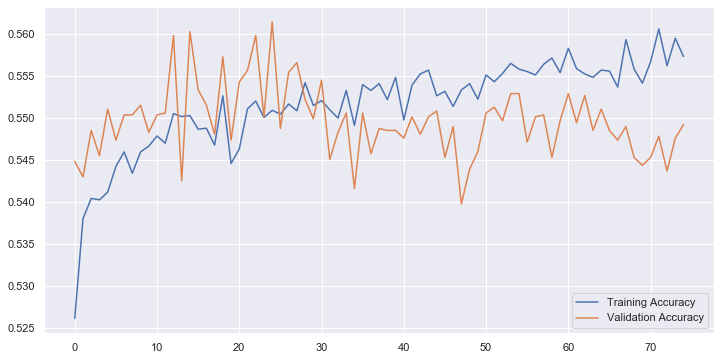

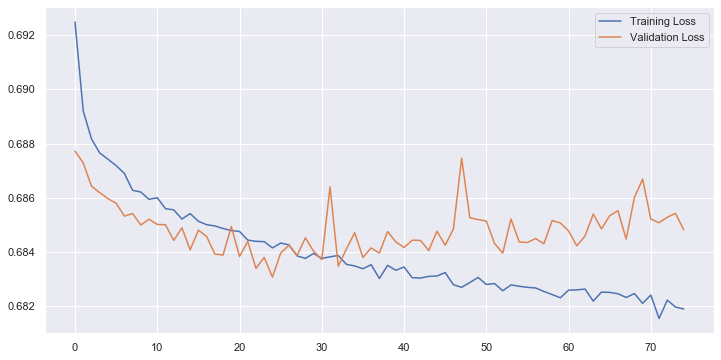

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the 'all_features' dataframe into training and test subsets. CV is performed using 'cross_val_score'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn = Sequential()
model_nn.add(Dense(20, activation='relu', input_dim=6))
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 50)

history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es])

# evaluate the model
_, train_acc = model_nn.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_nn.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred = model_nn.predict_classes(X_test)

# Compute each metric:
acc = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

# Print out the metrics:
print("Accuracy = {}".format(acc))
print("Recall = {}".format(recall))
print("Precision = {}".format(precision))
print("F1 Score = {}".format(f1_score))

Accuracy = 0.5385466617484324
Recall = 0.5278201219512195
Precision = 0.523036253776435
F1 Score = 0.5254172989377844


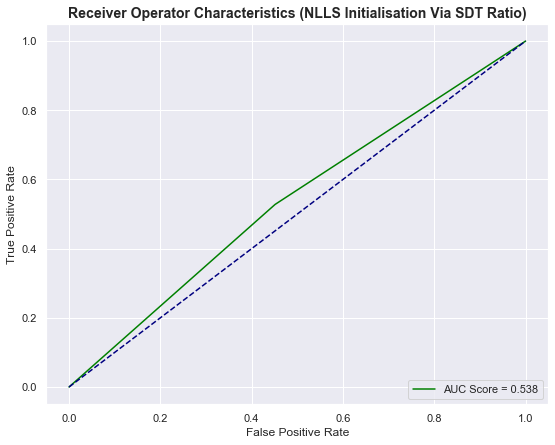

In [14]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr, tpr, thresholds) = roc_curve(y_pred, y_test)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score = auc(fpr, tpr)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics (NLLS Initialisation Via SDT Ratio)", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr, tpr, color='green', label="AUC Score = {}".format(round(auc_score, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>After Feature Selection (ONLY THE SDT RATIO)</h3>

In [30]:
# New training and label set:
X_new = final_df[selected]
y_new = final_df['label']

Train on 17347 samples, validate on 4337 samples
Epoch 1/100
17347/17347 [==============================] - 1s 57us/step - loss: 0.6896 - acc: 0.5292 - val_loss: 0.6832 - val_acc: 0.5527
Epoch 2/100
17347/17347 [==============================] - 1s 34us/step - loss: 0.6830 - acc: 0.5545 - val_loss: 0.6824 - val_acc: 0.5469
Epoch 3/100
17347/17347 [==============================] - 1s 33us/step - loss: 0.6824 - acc: 0.5520 - val_loss: 0.6826 - val_acc: 0.5529
Epoch 4/100
17347/17347 [==============================] - 1s 33us/step - loss: 0.6819 - acc: 0.5549 - val_loss: 0.6821 - val_acc: 0.5481
Epoch 5/100
17347/17347 [==============================] - 1s 33us/step - loss: 0.6816 - acc: 0.5559 - val_loss: 0.6818 - val_acc: 0.5527
Epoch 6/100
17347/17347 [==============================] - 1s 33us/step - loss: 0.6818 - acc: 0.5566 - val_loss: 0.6816 - val_acc: 0.5506
Epoch 7/100
17347/17347 [==============================] - 1s 34us/step - loss: 0.6814 - acc: 0.5550 - val_loss: 0.6822 - v

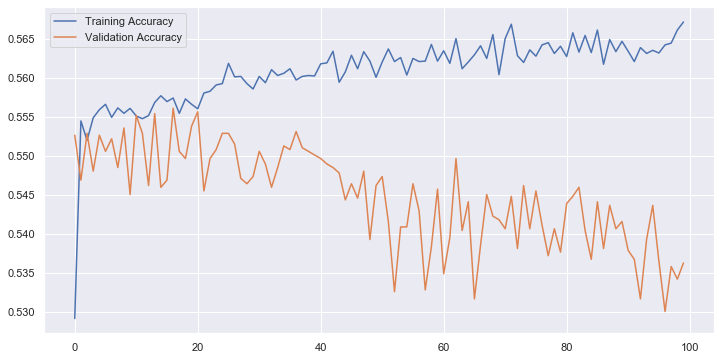

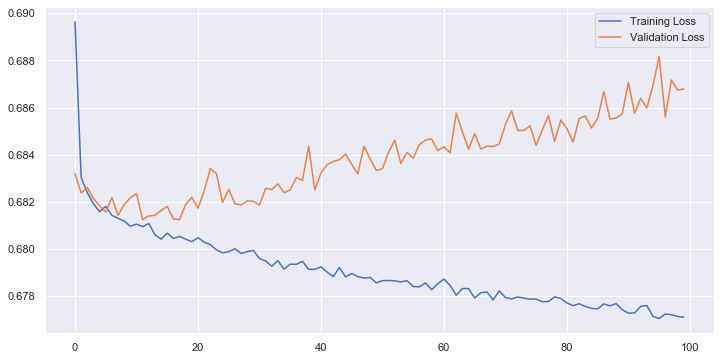

In [31]:
# Train-test splitting:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new)
X_train_new = std_scale.transform(X_train_new)
X_test_new = std_scale.transform(X_test_new)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn2 = Sequential()
model_nn2.add(Dense(20, activation='relu', input_dim=len(selected)))
model_nn2.add(Dense(10, activation='relu'))
model_nn2.add(Dense(1, activation='sigmoid'))

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn2.fit(X_train_new, y_train_new, validation_split=0.2, epochs=100)#, callbacks=[es])

# evaluate the model
_, train_acc = model_nn2.evaluate(X_train_new, y_train_new, verbose=0)
_, test_acc = model_nn2.evaluate(X_test_new, y_test_new, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred2 = model_nn2.predict_classes(X_test_new)

# Compute each metric:
acc2 = accuracy_score(y_pred2, y_test_new)
recall2 = recall_score(y_pred2, y_test_new)
precision2 = precision_score(y_pred2, y_test_new)
f1_score2 = f1_score(y_pred2, y_test_new)

# Print out the metrics:
print("Accuracy = {}".format(acc2))
print("Recall = {}".format(recall2))
print("Precision = {}".format(precision2))
print("F1 Score = {}".format(f1_score2))

Accuracy = 0.5625230542235338
Recall = 0.5744866754041066
Precision = 0.4847032805012901
F1 Score = 0.5257896841263495


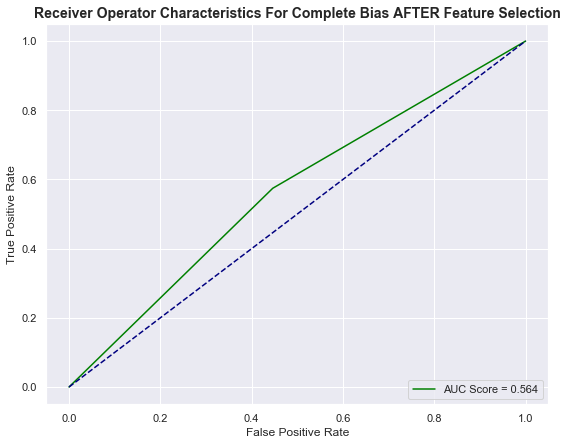

In [33]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr2, tpr2, thresholds2) = roc_curve(y_pred2, y_test_new)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score2 = auc(fpr2, tpr2)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr2, tpr2, color='green', label="AUC Score = {}".format(round(auc_score2, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Train-test splitting:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new2)
X_train_new2 = std_scale.transform(X_train_new2)
X_test_new2 = std_scale.transform(X_test_new2)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model_nn3 = Sequential()
model_nn3.add(Dense(20, activation='relu', input_dim=len(selected)))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(10, activation='relu'))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))

model_nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn3.fit(X_train_new2, y_train_new2, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn3.evaluate(X_train_new2, y_train_new2, verbose=0)
_, test_acc = model_nn3.evaluate(X_test_new2, y_test_new2, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 17347 samples, validate on 4337 samples
Epoch 1/250
17347/17347 [==============================] - 1s 67us/step - loss: 0.6900 - acc: 0.5282 - val_loss: 0.6840 - val_acc: 0.5483
Epoch 2/250
17347/17347 [==============================] - 1s 43us/step - loss: 0.6858 - acc: 0.5468 - val_loss: 0.6838 - val_acc: 0.5589
Epoch 3/250
17347/17347 [==============================] - 1s 50us/step - loss: 0.6855 - acc: 0.5487 - val_loss: 0.6830 - val_acc: 0.5536
Epoch 4/250
17347/17347 [==============================] - 1s 44us/step - loss: 0.6837 - acc: 0.5521 - val_loss: 0.6834 - val_acc: 0.5573
Epoch 5/250
17347/17347 [==============================] - 1s 48us/step - loss: 0.6835 - acc: 0.5490 - val_loss: 0.6830 - val_acc: 0.5564
Epoch 6/250
17347/17347 [==============================] - 1s 48us/step - loss: 0.6832 - acc: 0.5524 - val_loss: 0.6831 - val_acc: 0.5575
Epoch 7/

17347/17347 [==============================] - 1s 41us/step - loss: 0.6803 - acc: 0.5650 - val_loss: 0.6829 - val_acc: 0.5573
Epoch 116/250
17347/17347 [==============================] - 1s 40us/step - loss: 0.6806 - acc: 0.5609 - val_loss: 0.6824 - val_acc: 0.5582
Epoch 117/250
17347/17347 [==============================] - 1s 38us/step - loss: 0.6798 - acc: 0.5640 - val_loss: 0.6820 - val_acc: 0.5589
Epoch 118/250
17347/17347 [==============================] - 1s 42us/step - loss: 0.6813 - acc: 0.5585 - val_loss: 0.6825 - val_acc: 0.5561
Epoch 119/250
17347/17347 [==============================] - 1s 42us/step - loss: 0.6803 - acc: 0.5601 - val_loss: 0.6827 - val_acc: 0.5531
Epoch 120/250
17347/17347 [==============================] - 1s 47us/step - loss: 0.6798 - acc: 0.5603 - val_loss: 0.6827 - val_acc: 0.5529
Epoch 121/250
17347/17347 [==============================] - 1s 49us/step - loss: 0.6799 - acc: 0.5618 - val_loss: 0.6820 - val_acc: 0.5559
Epoch 122/250
17347/17347 [=======

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred3 = model_nn3.predict_classes(X_test_new2)

# Compute each metric:
acc3 = accuracy_score(y_pred3, y_test_new2)
recall3 = recall_score(y_pred3, y_test_new2)
precision3 = precision_score(y_pred3, y_test_new2)
f1_score3 = f1_score(y_pred3, y_test_new2)

# Print out the metrics:
print("Accuracy = {}".format(acc3))
print("Recall = {}".format(recall3))
print("Precision = {}".format(precision3))
print("F1 Score = {}".format(f1_score3))

In [ ]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr3, tpr3, thresholds3) = roc_curve(y_pred3, y_test_new2)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score3 = auc(fpr3, tpr3)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr3, tpr3, color='green', label="AUC Score = {}".format(round(auc_score3, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()